In [1]:
import numpy as np
import pandas as pd
import haversine
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
#https://www.gushiciku.cn/pl/pTkV/zh-tw

from haversine import haversine, Unit
from geopy.distance import geodesic
import math 


# 計算距離
def getDistance(latA, lonA, latB, lonB):
    point1 = (latA, lonA)
    point2 = (latB, lonB)
    #result1 = haversine(point1, point2)
    #result1 = geodesic(point1, point2).km
    result1=math.sqrt((latA-latB)**2+(lonA-lonB)**2)
    
   
    
    return result1

# 列出車站經緯度

In [3]:
'''
車站經緯度參考Google Map：
台北高鐵 25.047889128795028, 121.51627579892524
新竹高鐵 24.808418091431978, 121.04020158289345
台中高鐵 24.11241418027106, 120.61605343870609
台南高鐵 22.924916665343844, 120.2855868963668
高雄高鐵 22.688146443931807, 120.30902853869263
花蓮瑞穗 23.497384823901992, 121.37684099773809
台東池上 23.12611585827578, 121.21946711926812
'''

data = np.array([(25.047889128795028,121.51627579892524),
                 (24.808418091431978,121.04020158289345),
                 (24.11241418027106,120.61605343870609),                 
                 (22.924916665343844,120.2855868963668),
                 (22.688146443931807,120.30902853869263),    
                 (23.497384823901992,121.37684099773809),
                 (23.12611585827578,121.21946711926812),
                ]
               )

index = ['Taipei','Hsinchu','Taichung','Tainan','Kaohsiung','Hualien','Taitung']
columns = ['lat','lon']
Word = pd.DataFrame(data,index,columns)
Word

,lat,lon
Taipei,25.047889,121.516276
Hsinchu,24.808418,121.040202
Taichung,24.112414,120.616053
Tainan,22.924917,120.285587
Kaohsiung,22.688146,120.309029
Hualien,23.497385,121.376841
Taitung,23.126116,121.219467


# 計算車站間的距離

In [4]:
q=[[],[],[],[],[],[],[]]
for i in range(len(Word.index)):
    for j in range(len(Word.index)):
        a = float(getDistance(Word.iat[i,0], Word.iat[i,1], Word.iat[j,0], Word.iat[j,1]))
        q[i].append(a)  
print(q)

index = ['Taipei','Hsinchu','Taichung','Tainan','Kaohsiung','Hualien','Taitung']
columns = ['Taipei','Hsinchu','Taichung','Tainan','Kaohsiung','Hualien','Taitung']
zzz = pd.DataFrame(q,index,columns)
zzz

[[0.0, 0.5329099707324108, 1.2982733445443801, 2.4538963416274306, 2.6506285077514384, 1.556761273694183, 1.9445585348870424], [0.5329099707324108, 0.0, 0.8150601772684479, 2.029044343329576, 2.2428031299601354, 1.3535635648898405, 1.691826508899191], [1.2982733445443801, 0.8150601772684479, 0.0, 1.2326226038670565, 1.4569841708149114, 0.9782938306938324, 1.1562406539557906], [2.4538963416274306, 2.029044343329576, 1.2326226038670565, 0.0, 0.2379278217074192, 1.2322967606557365, 0.9553080058089575], [2.6506285077514384, 2.2428031299601354, 1.4569841708149114, 0.2379278217074192, 0.0, 1.3398097638506272, 1.010304714876216], [1.556761273694183, 1.3535635648898405, 0.9782938306938324, 1.2322967606557365, 1.3398097638506272, 0.0, 0.4032458089823586], [1.9445585348870424, 1.691826508899191, 1.1562406539557906, 0.9553080058089575, 1.010304714876216, 0.4032458089823586, 0.0]]


,Taipei,Hsinchu,Taichung,Tainan,Kaohsiung,Hualien,Taitung
Taipei,0.000000,0.532910,1.298273,2.453896,2.650629,1.556761,1.944559
Hsinchu,0.532910,0.000000,0.815060,2.029044,2.242803,1.353564,1.691827
Taichung,1.298273,0.815060,0.000000,1.232623,1.456984,0.978294,1.156241
Tainan,2.453896,2.029044,1.232623,0.000000,0.237928,1.232297,0.955308
Kaohsiung,2.650629,2.242803,1.456984,0.237928,0.000000,1.339810,1.010305
Hualien,1.556761,1.353564,0.978294,1.232297,1.339810,0.000000,0.403246
Taitung,1.944559,1.691827,1.156241,0.955308,1.010305,0.403246,0.000000


# MDS轉換

In [5]:
mds = MDS()
mds.fit(q)

/home/jupyter12/.conda/envs/ML_HW3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


MDS()

In [6]:
a = mds.embedding_
print(a)

[[-2.75899756  0.62542614]
 [-2.16141213 -0.05885279]
 [-0.56431567 -0.26796734]
 [ 1.70707952 -1.12121398]
 [ 2.11764029 -0.99528399]
 [ 0.4605456   1.06089646]
 [ 1.19945996  0.75699549]]


# 繪製結果

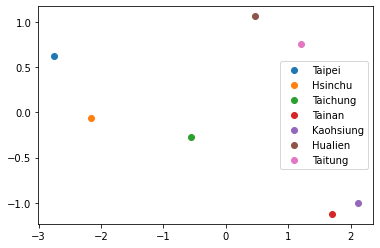

In [7]:
for i in range(int(np.size(a) / 2)):
    plt.scatter(a[i,0],a[i,1],label=index[i])
plt.legend()
#y_major_locator = MultipleLocator(50)
#ay=plt.gca()
#ay.yaxis.set_major_locator(y_major_locator)

plt.show()

In [8]:
int(np.size(a) / 2)

7